In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
mydata=pd.read_csv("diabetes.csv")

In [3]:
mydata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
mydata.shape

(768, 9)

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
mydata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
mydata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# glucose,bp,skin,insuline,bmi,dpf,age cannot be zero

In [9]:
median1=mydata['Glucose'].median()
median2=mydata['BloodPressure'].median()
median3=mydata['SkinThickness'].median()
median4=mydata['Insulin'].median()
median5=mydata['BMI'].median()
median6=mydata['DiabetesPedigreeFunction'].median()
median7=mydata['Age'].median()


In [10]:
mydata['Glucose']=mydata['Glucose'].replace(to_replace=0,value=np.nan)
mydata['Glucose']=mydata['Glucose'].astype('float64')

mydata['BloodPressure']=mydata['BloodPressure'].replace(to_replace='0',value=np.nan)
mydata['BloodPressure']=mydata['BloodPressure'].astype('float64')

mydata['SkinThickness']=mydata['SkinThickness'].replace(to_replace='0',value=np.nan)
mydata['SkinThickness']=mydata['SkinThickness'].astype('float64')

mydata['Insulin']=mydata['BloodPressure'].replace(to_replace='0',value=np.nan)
mydata['Insulin']=mydata['BloodPressure'].astype('float64')

mydata['BMI']=mydata['BMI'].replace(to_replace='0',value=np.nan)
mydata['BMI']=mydata['BMI'].astype('float64')

mydata['DiabetesPedigreeFunction']=mydata['DiabetesPedigreeFunction'].replace(to_replace='0',value=np.nan)
mydata['DiabetesPedigreeFunction']=mydata['DiabetesPedigreeFunction'].astype('float64')

mydata['Age']=mydata['Age'].replace(to_replace='0',value=np.nan)
mydata['Age']=mydata['Age'].astype('float64')


In [11]:
mydata['Glucose'].replace(np.nan,median1,inplace=True)
mydata["BloodPressure"].replace(np.nan,median2,inplace=True)
mydata["SkinThickness"].replace(np.nan,median3,inplace=True)
mydata["Insulin"].replace(np.nan,median4,inplace=True)
mydata["BMI"].replace(np.nan,median5,inplace=True)
mydata["DiabetesPedigreeFunction"].replace(np.nan,median6,inplace=True)
mydata["Age"].replace(np.nan,median7,inplace=True)

In [12]:
mydata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,72.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,66.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0.0,64.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,66.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,40.0,43.1,2.288,33.0,1


In [13]:
median3

23.0

## Split Data

In [14]:
X=mydata.drop(["Outcome"],axis=1)
y=mydata["Outcome"]

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=8)

## Fit Logistic Model

In [108]:
reg_model=LogisticRegression( max_iter=100)
reg_model.fit(X_train,y_train)

LogisticRegression()

In [109]:
reg_model.score(X_train,y_train)

0.7690875232774674

In [110]:
reg_model.score(X_test,y_test)

0.7878787878787878

## Confusion metrix

In [111]:
predictions=reg_model.predict(X_test)

In [112]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,predictions)

In [113]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       147
           1       0.76      0.61      0.68        84

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[131,  16],
       [ 33,  51]], dtype=int64)

<AxesSubplot:>

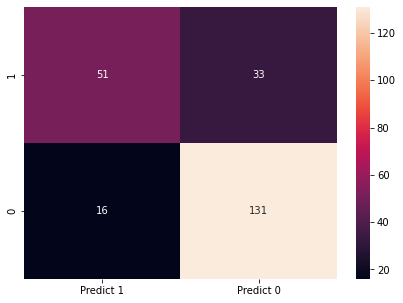

In [115]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## SVM

In [116]:
from sklearn.svm import SVC

In [117]:
clf=SVC(kernel='linear',C=2.0,gamma='auto')
#kernel is for changing direction    

In [118]:
clf.fit(X_train,y_train)

SVC(C=2.0, gamma='auto', kernel='linear')

In [119]:
clf.score(X_train,y_train)

0.7690875232774674

In [120]:
clf.score(X_test,y_test)

0.7922077922077922

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)
#p=1 , manhattan distance
#p=2 , euclidean distance

In [135]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [136]:
knn.score(X_train,y_train)

0.8119180633147114

In [137]:
knn.score(X_test,y_test)

0.7792207792207793